In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from imp import reload

import seaborn as sns
sns.set_style("dark")

%matplotlib inline

img_base_path = r"../image_data/DIP3E_CH11_Original_Images/"

# 表示

## Moore边界追踪

## Freeman链码

计算Freeman链码的步骤如下：
1. 获取Freeman网格线对应的坐标，x和y轴分别为x_freeman_list,y_freeman_list
2. 遍历边界的每个点，如果该点在freeman网格线上，执行如下步骤：
    * 判断该线是横线还是竖线
    * 算出该点在线中心的方向（上下左右），然后找出最邻近的Freeman坐标
    * 从最左面的点开始，顺时针扫描Freeman坐标上的点，根据方向判断链码

(570, 570)


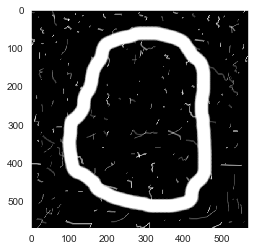

In [2]:
img_path = os.path.join(img_base_path,"Fig1105(a)(noisy_stroke).tif")
img = Image.open(img_path)
img = np.asarray(img)

print(img.shape)

plt.imshow(img,cmap="gray")

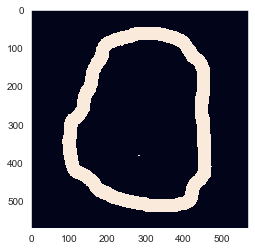

In [3]:
tmp_img = cv2.blur(img,(9,9))
th,tmp_img = cv2.threshold(tmp_img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(tmp_img)
plt.show()

3


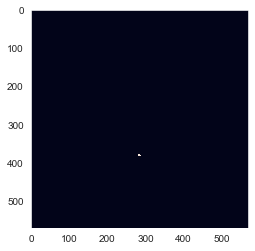

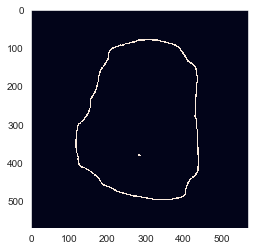

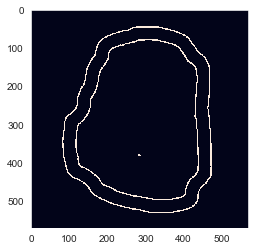

In [4]:
image,contours, hierarchy = cv2.findContours(tmp_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# plt.imshow()
print(len(contours))
black_img = np.zeros_like(img)

for i in range(len(contours)):
    plt.imshow(cv2.drawContours(black_img,contours,i,[22,255,255],2))
    plt.show()

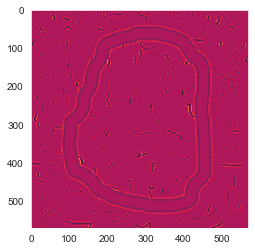

In [20]:
t_img = cv2.blur(img,(5,5))
t_img = cv2.Laplacian(t_img,3)
plt.imshow(t_img,)